<a href="https://colab.research.google.com/github/hemasphere/CS381/blob/main/H_Muni_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hema Muni

CS 381

Quiz 3

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv")
df = df.iloc[: , 1:]
df.index = df.index + 1

df

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
3,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
4,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
5,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12791,0,5.0,-0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12792,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12793,4,6.0,0.170,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12794,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


#**Exploratory Data Analysis**


**Attributes:**


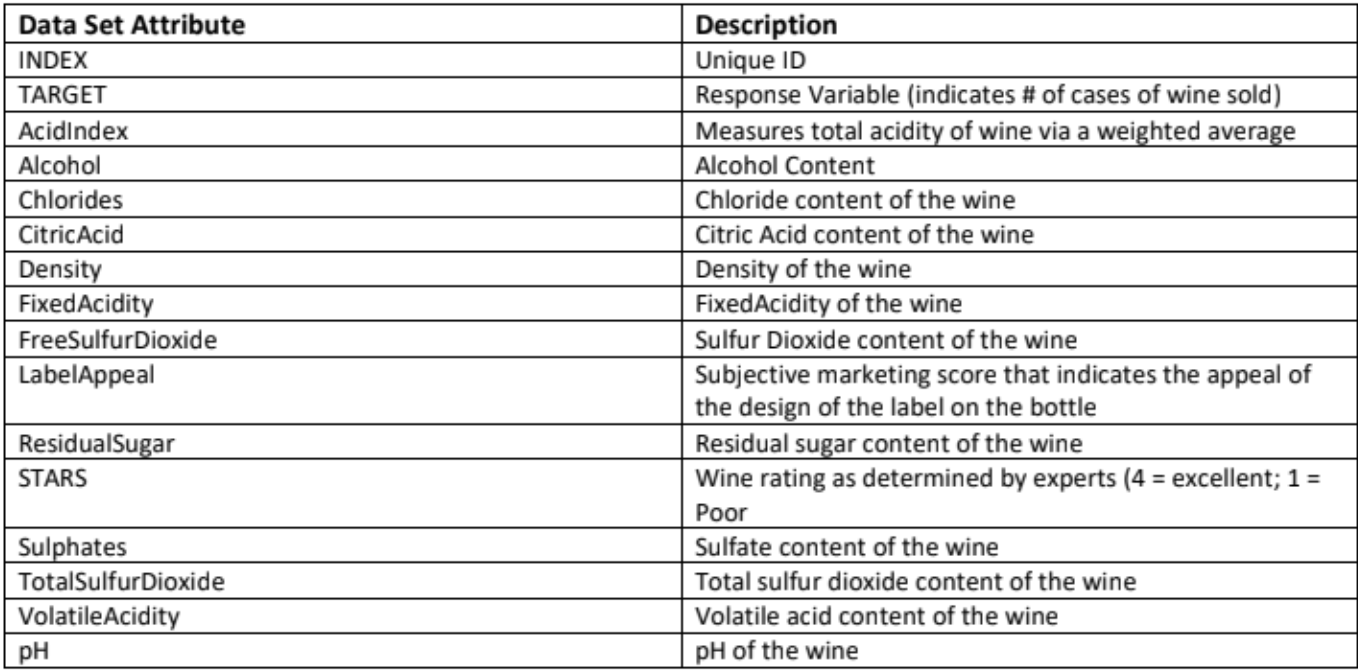



1. The range for Acidity in wine is about 0.6% to 0.8%.

2. For Chloride, "the higher extraction of chloride during red winemaking is due to the ions extracted from skins during fermentation." Red juice should not have more than 356mg/L chloride ions. The maximum level is 606mg/L chloride.

3. Citric acid is added to either complement a flavor, or even increase the acidity and give it a fresh flavor. "The disadvantage of adding citric acid is its microbial instability." which means that there can be a microbiological problems that would occur at any time during the winemaking process. 

4. The typical density is generally between 1.080 and 1.090. This essentially means wine is 8-9% more dense than water.

5. For fixed acids, there are tartaric, malic, citric, and succinic. In general one for tartaric acid, the range can be from 1,000 to 4,000 mg/L, for malic acid the range can be from 0 to 8,000 mg/L, for citric acid the range can be from 0 to 500 mg/L, and for succinic acid the range can be from 500 to 2,000 mg/L. This is a general statement but it depend on the wine that can make the levels vary. 

6. Free Sulfur Dioxide are those available to react and thus exhibit both germicidal(nonspecific antimicrobial agents that are too toxic to be administered internally but are safe and effective when used topically) and antioxidant (prevent or slow damage to cells caused by free radicals, unstable molecules that the body produces as a reaction to environmental and other pressures) properties.

7. Residual Sugar is displayed in three ways: in grams/Liter, in grams/100ml, or as a percentage. An example of this would be that 10 grams per liter of residual sugar is equal to 1 percent sweetness. Wines range from 0 to 220 grams per liter sugar (g/L), depending on the kind of style.

8. Wine ranges from about 5 mg/L (parts per million) to about 200 mg/L when it comes to sulfur amounts. The maximum amount is 350 mg/l.

9. Total Sulfur Dioxide is the portion of SO2 that is free in the wine and the portion that is bound to other chemicals such as aldehydes, pigments, or sugars.

10. The pH of wine ranges from 2.9 to 4.2

Question I would like to answer: does the cases of wine sold depend more on the stars or the label appeal?

In [ ]:
df.dtypes

In [ ]:
df.nunique

In [ ]:
#histograms matplot
numericDataColumns = ['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
                      'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 
                      'AcidIndex', 'STARS']
num_vals = df[numericDataColumns].copy()
num_vals.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
plt.rcParams.update({'figure.figsize': (20, 20)})
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#see if we have any null values
df.isnull().sum()

#**Data Cleaning**

In [ ]:
#change df to abs so theres no negative values 
#since there are no negative values in acid when comes to wine
df = abs(df)

In [ ]:
#check if there are duplicated values because if so we can delete them and get the cleaner data
print(sum(df.duplicated()))

0


In [ ]:
#to see missing dataa
ax = msno.matrix(df)

In [ ]:
#normalizing data will scale most of the data to a small interval if we have outliers
target = df["TARGET"]
normalized_df = (df-df.mean())/df.std()
normalized_df.drop("TARGET", 1, inplace = True)
normalized_df

In [ ]:
#range is 0-1, preserves shape of original distribution, does not reduce importance of outliers, 
#least disruptve to original data
min_max_df = (df-df.min())/(df.max()-df.min())
min_max_df.drop("TARGET", 1, inplace=True)
min_max_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
1,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.333333
2,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.666667
3,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.666667
4,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.000000
5,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12791,0.440000,0.309119,0.739437,0.493772,0.481364,0.485569,0.491489,0.581009,0.515044,0.502035,0.307692,0.75,0.076923,NaN
12792,0.514286,0.503864,0.497183,0.790853,0.567010,0.516978,NaN,0.507175,0.704425,0.261872,NaN,0.25,0.307692,0.333333
12793,0.459048,0.457496,0.301408,0.612753,0.495242,0.492360,0.495213,0.486242,0.490265,NaN,0.544872,0.50,0.153846,0.333333
12794,0.491429,0.480680,0.473239,NaN,0.475813,0.493209,0.583511,0.485484,0.617699,0.508820,0.503205,0.25,0.153846,0.333333


In [ ]:
drop_NA = df.dropna()
drop_NAN = normalized_df.dropna()
drop_NANM = min_max_df.dropna()
drop_NA

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
3,5,7.1,2.640,-0.88,14.80,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
4,3,5.7,0.385,0.04,18.80,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
10,6,5.5,-0.220,0.39,1.80,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0
11,0,-17.2,0.520,0.15,-33.80,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,1.0
13,3,6.0,0.330,-1.06,3.00,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12780,3,-4.1,0.550,0.31,13.55,0.133,-29.0,-49.0,0.99544,3.20,0.86,11.0,-1,7,2.0
12781,3,7.5,0.180,0.34,1.30,0.055,50.0,153.0,0.97759,2.04,0.07,7.8,-1,8,2.0
12784,0,8.2,0.390,0.17,2.30,0.099,47.0,551.0,1.00223,4.28,0.12,9.8,0,9,1.0
12789,4,8.4,0.300,0.38,37.10,0.633,-208.0,220.0,0.99830,2.83,0.25,9.3,-1,8,3.0


Here I'm crossing both the Target data and the LabelAppeal data and Target data and Star data to see how they correspond with each other. 

In [ ]:
pd.crosstab(df.TARGET, df.LabelAppeal)

LabelAppeal,0,1,2
TARGET,,,
0,1193,1331,210
1,19,89,136
2,152,762,177
3,1347,1188,76
4,1972,1178,27
5,775,1128,111
6,155,427,183
7,4,79,59
8,0,2,15


When looking at this table, I don't understand how a wine bottle can have 0 appeal and 1,193 of 1 cases were sold. It seems very weird to me. We did the absolute value of all numbers in the dataframe, but if we did not, we could've had a -2 appeal, but I'm unsure of what that -2 could mean and how a wine bottle can have -2 appeal. 

In [ ]:
pd.crosstab(df.TARGET, df.STARS)

STARS,1.0,2.0,3.0,4.0
TARGET,,,,
0,607,89,0,0
1,98,20,0,0
2,469,253,34,0
3,916,948,290,0
4,716,1333,764,104
5,214,716,750,233
6,22,199,313,199
7,0,12,57,65
8,0,0,4,11


I found this table interesting when comparing the number of cases that were sold and the stars, I would've expected more 4 star rating cases to be sold.

#Data Transformation and Imputing

In [ ]:
#i did get this from your udemy section because this is what i wanted to do 
#anyway, like how i did in quiz 2 but this way was a lot simpler

from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
im=SimpleImputer()
imputed = im.fit_transform(df[num_cols])
imputed = pd.DataFrame(imputed)
imputed.head()

In [ ]:
imputed.describe()

#**Summary**

My question was: does the cases of wine sold depend more on the stars or the label appeal? When we look at the correlation we can see that the cases of wine does have a stronger correlation to stars (the ratings) compared to the label appeal. 

When doing the data transformation, I decided to fill the missing values with the mean because that's what I did for Quiz 2 and I felt that it was better to replace it with the mean compared to dropping the values in total. If we drop it in total then we miss data that may be valuable and get the wrong data values. This didn't seem to change anything in describe method and everything stayed the same. When transforming the missing data to a mean value, I thought it would change the values in total but it didn't. 

Honestly I didn't like this dataset, I felt like a lot of the attribute values were put in wrong and the range was weird to look at. For instance, the label appeal was ranging from -2 to 2, and I have no idea what those numbers mean and why there's a negative value. Some of the acid values were negative which was really weird because how can we have a negative value for acidity. 

#**Resources**
[Acid in wine](https://www.homebrewit.com/pages/a-detailed-explanation-of-acids-used-in-wine-making#:~:text=In%20the%20United%20States%2C%20titratable,from%200.55%20to%200.85%20percent)

[Mean imputation](https://https://www.theanalysisfactor.com/mean-imputation/)

[Udemy](https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/21953142#notes)

[Acid calculation](https://www.piwine.com/determining-total-acidity.html#:~:text=The%20ideal%20total%20acidity%20of,is%20lost%20during%20the%20process.)

[Chloride acid](https://www.awri.com.au/wp-content/uploads/2018/08/s1530.pdf#:~:text=The%20higher%20extraction%20of%20chloride,juice%20x%201.7%20%3D%20606)

[Citric acid](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid#:~:text=Citric%20acid%20is%20often%20added,acid%20is%20its%20microbial%20instability.)